In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
path = os.getcwd() + '/ex2data1.txt'  
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])  

In [2]:
data.head() 

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


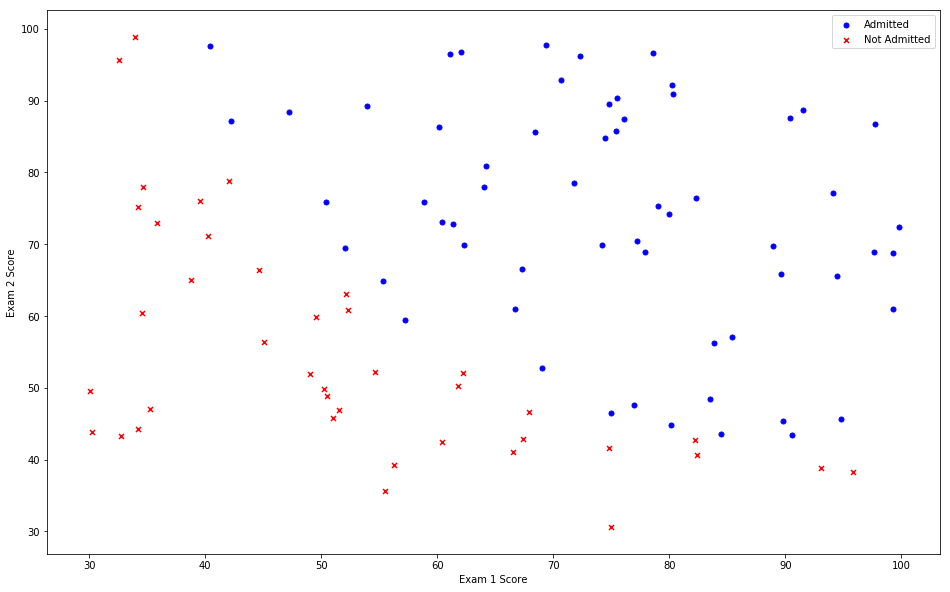

In [4]:
# Seperate positive and negative data sets
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig1, ax1 = plt.subplots(figsize=(16, 10))  
ax1.scatter(positive['Exam 1'], positive['Exam 2'], s=25, c='b', marker='o', label='Admitted')  
ax1.scatter(negative['Exam 1'], negative['Exam 2'], s=25, c='r', marker='x', label='Not Admitted')  
ax1.legend()  
ax1.set_xlabel('Exam 1 Score')  
ax1.set_ylabel('Exam 2 Score')  

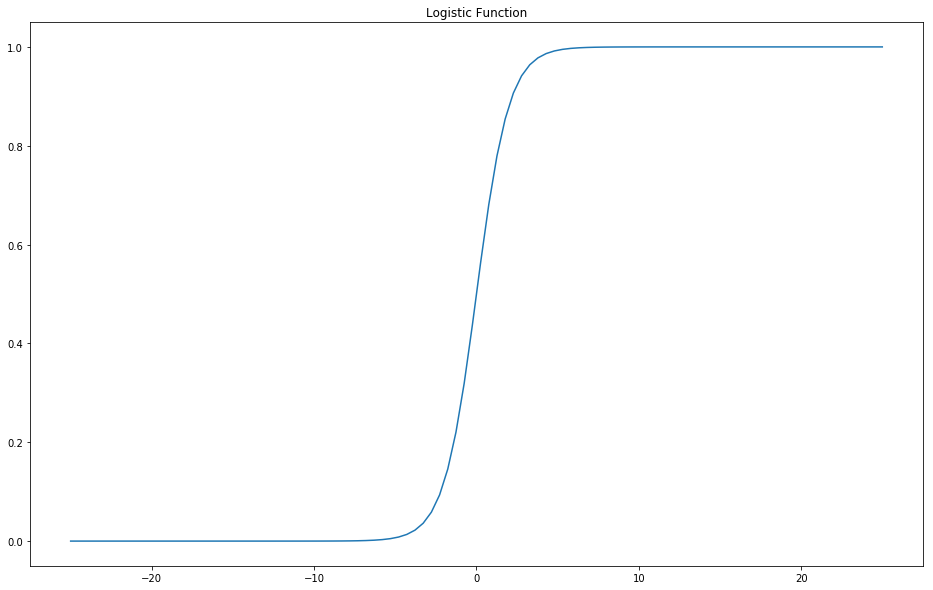

In [5]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

x = np.linspace(-25.0, 25.0, 100)

fig2, ax2 = plt.subplots(figsize=(16,10))  
ax2.plot(x, sigmoid(x)) 
ax2.set_title('Logistic Function')  

In [6]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):  
    """
    Calculate the gradient for minimization
    """
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [7]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  

In [8]:
import scipy.optimize as opt  

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
h = np.matrix(result[0])

In [9]:
scores = np.matrix([1, 45, 85])

# Calculate the probability that a student gets Admitted with scores of 45 and 85 respectively
p = sigmoid(scores * h.T)

def predict(theta, X):
    """Predict Acceptance using model"""
    p = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in p]

predictions = predict(h, X)

# Compare predictions to result in training data set
# Keep in mind that this is training set accuracy 
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)] 
print("Accuracy of classifier", correct.count(1) / len(correct) * 100, "%")

Accuracy of classifier 89.0 %


In [10]:
x = np.array([np.min(X[:,1]), np.max(X[:,1])])
theta = np.array(h.T)

# theta0 + theta1 * x1 + theta2 * x2 = 0
# y=mx+b is replaced by x2 = (-1 / thetheta2)(theta0 + theta1 * x1)
y = (-1. / theta[2]) * (theta[0] + theta[1] * x)

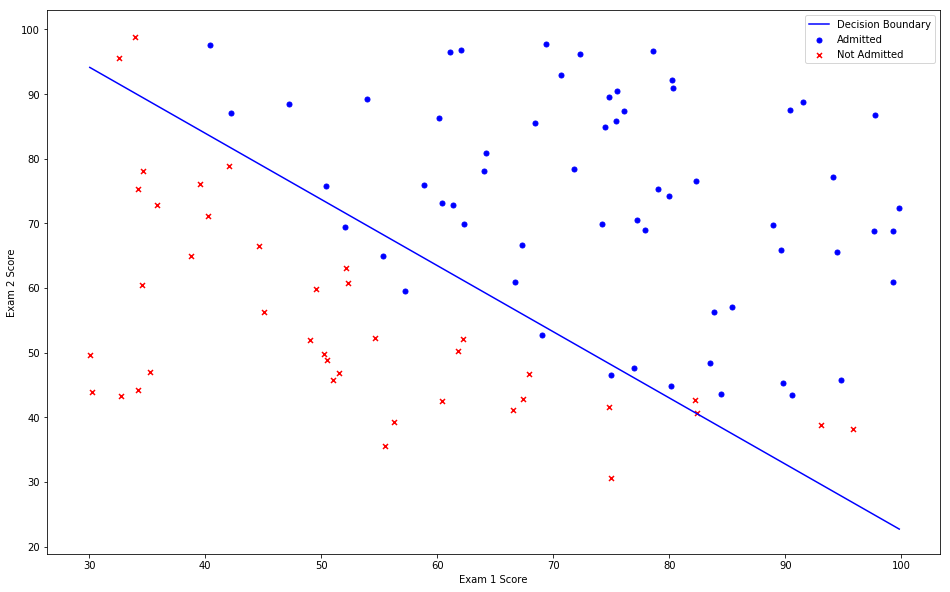

In [11]:
# Plotting the decision boundary
ax1.plot(x, y, 'b-', label='Decision Boundary') 
ax1.legend()  
fig1